In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
from dropout_defense import Dropout_defense
import utils
import matplotlib.pyplot as plt
import numpy as np
import torch

# MNIST

#### Initialize an object of class Dropout_defense.
It takes a few minutes to load the data.

In [ ]:
mnist = Dropout_defense(dataset='mnist', num_examples=1000)


#### Visualize ensemble of forward passes

In [ ]:
mnist.visualize(dropout_prob=0.02,
                original_label=8,
                target_label=4,
                ensemble_size=50,
                type='prediction',
                num_to_plot=10)


# Plot heatmap of filtered predictions
For each example, we compute several forward passes with dropout enabled. We then predict to the class that receives the plurality of predictions from this ensemble of forward passes. We compute these predictions for all examples of each (original_label, target_label) pair and compute the fraction of adversarial images that this method successfully thwarts. We also compute the percentage of adversarial images that still fool the model with this defense strategy employed. The heatmaps below summarize the above statistics for each (original_label, target_label) pair.

In [ ]:
mnist.filter_heatmap(dropout_prob=0.1,ensemble_size=50)


In [ ]:
# Variance
mnist.uncertainty_heatmap(dropout_prob=0.1, ensemble_size=50, method='variance')


In [ ]:
# Entropy
mnist.uncertainty_heatmap(dropout_prob=0.1, ensemble_size=50, method='entropy')


# CIFAR

#### Initialize an object of class Dropout_defense.
It takes a few minutes to load the data.

In [6]:
cifar = Dropout_defense(dataset='cifar', file_name='cifar_momentum', num_examples=1000)


Loading data...
  | 0 1 2 3 4 5 6 7 8 9
-----------------------
0 |   1 1 1 1 1 1 1 1 1 
1 | 1   1 1 1 1 1 1 1 1 
2 | 1 1   1 1 1 1 1 1 1 
3 | 1 1 1   1 1 1 1 1 1 
4 | 1 1 1 1   1 1 1 1 1 
5 | 1 1 1 1 1   1 1 1 1 
6 | 1 1 1 1 1 1   1 1 1 
7 | 1 1 1 1 1 1 1   1 1 
8 | 1 1 1 1 1 1 1 1   1 
9 | 1 1 1 1 1 1 1 1 1   
Data loaded. Took 90.6 seconds.


#### Visualize ensemble of forward passes

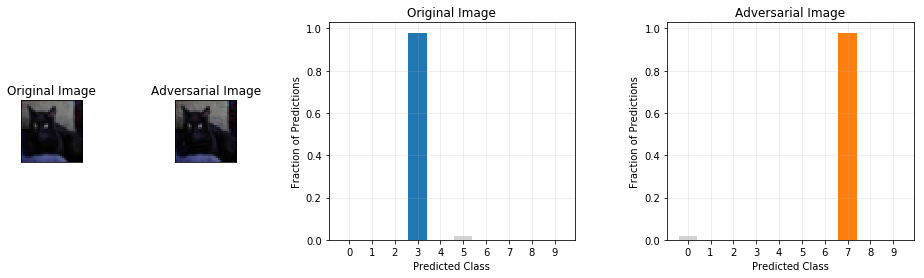

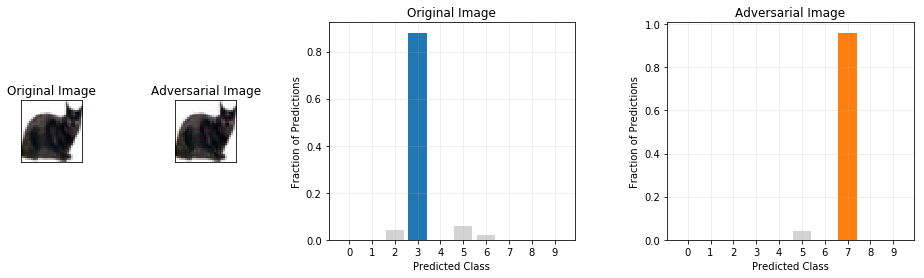

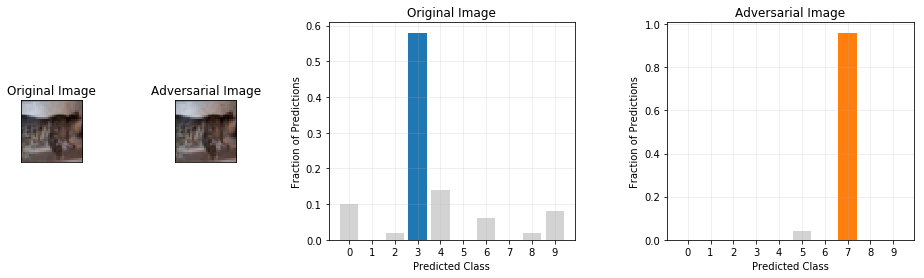

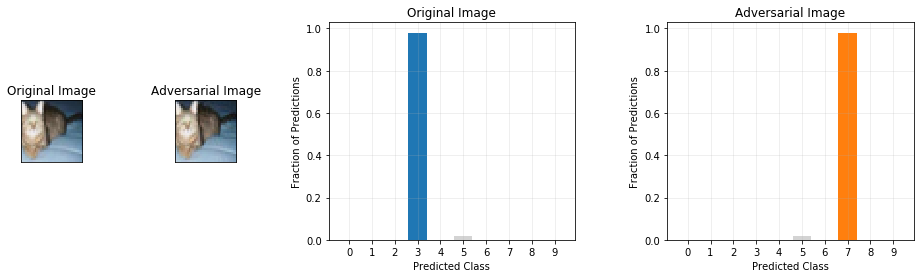

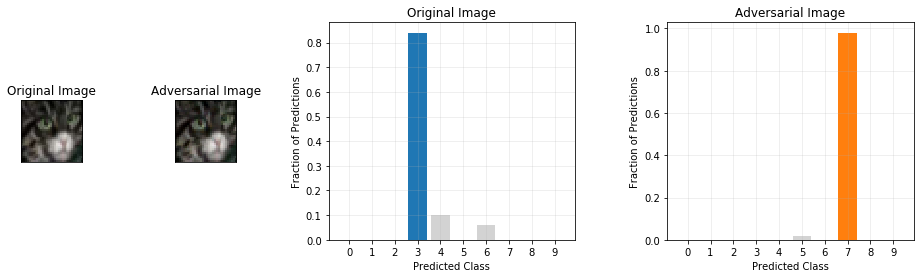

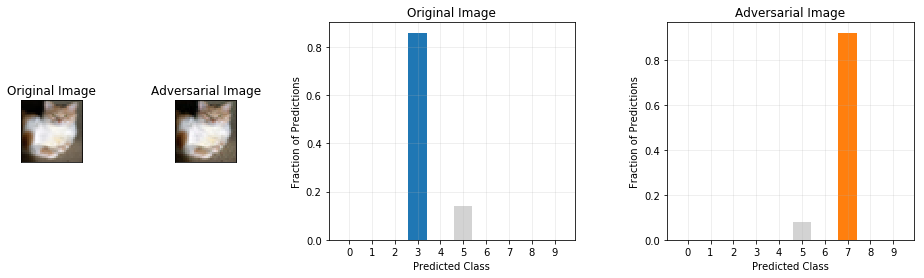

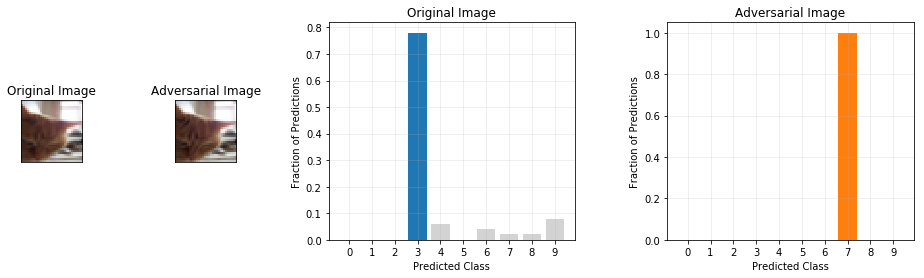

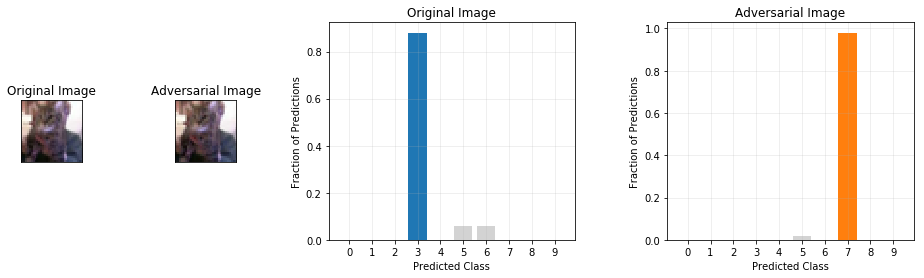

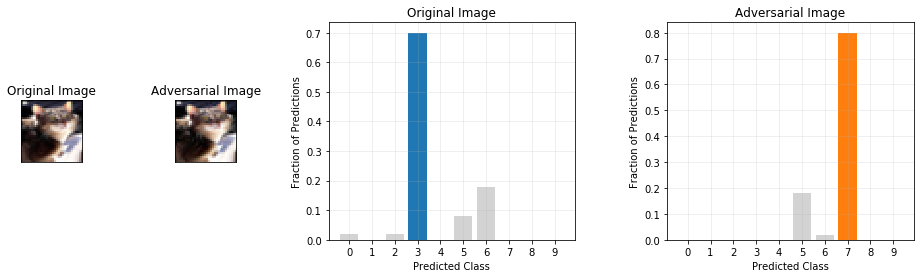

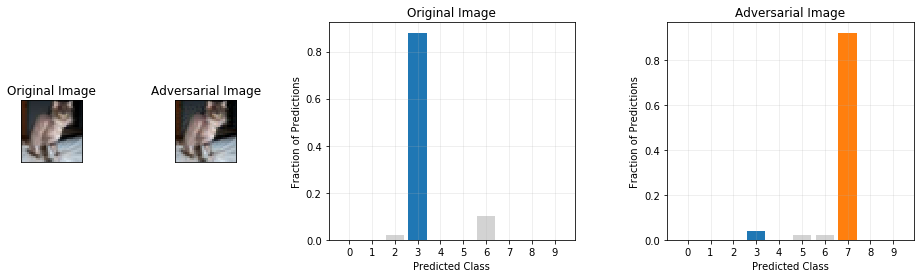

In [22]:
cifar.visualize(dropout_prob=0.1,
                original_label=3,
                target_label=7,
                ensemble_size=50,
                type='prediction',
                num_to_plot=10)



# Plot heatmap of filtered predictions
For each example, we compute several forward passes with dropout enabled. We then predict to the class that receives the plurality of predictions from this ensemble of forward passes. We compute these predictions for all examples of each (original_label, target_label) pair and compute the fraction of adversarial images that this method successfully thwarts. We also compute the percentage of adversarial images that still fool the model with this defense strategy employed. The heatmaps below summarize the above statistics for each (original_label, target_label) pair.

  | 0 1 2 3 4 5 6 7 8 9
-----------------------
0 |   1 1 1 1 1 1 1 1 1 
1 | 1   1 1 1 1 1 1 1 1 
2 | 1 1   1 1 1 1 1 1 1 
3 | 1 1 1   1 1 1 1 1 1 
4 | 1 1 1 1   1 1 1 1 1 
5 | 1 1 1 1 1   1 1 1 1 
6 | 1 1 1 1 1 1   1 1 1 
7 | 1 1 1 1 1 1 1   1 1 
8 | 1 1 1 1 1 1 1 1   1 
9 | 1 1 1 1 1 1 1 1 1   
Took 29.55 minutes


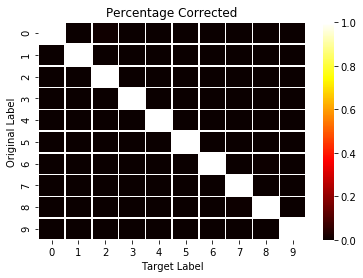

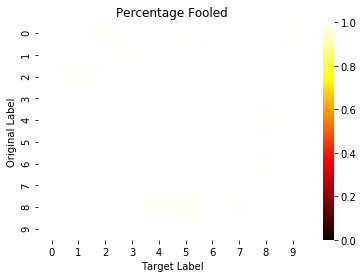

In [23]:
cifar.filter_heatmap(dropout_prob=0.1,ensemble_size=50)


  | 0 1 2 3 4 5 6 7 8 9
-----------------------
0 |   1 1 1 1 1 1 1 1 1 
1 | 1   1 1 1 1 1 1 1 1 
2 | 1 1   1 1 1 1 1 1 1 
3 | 1 1 1   1 1 1 1 1 1 
4 | 1 1 1 1   1 1 1 1 1 
5 | 1 1 1 1 1   1 1 1 1 
6 | 1 1 1 1 1 1   1 1 1 
7 | 1 1 1 1 1 1 1   1 1 
8 | 1 1 1 1 1 1 1 1   1 
9 | 1 1 1 1 1 1 1 1 1   
Took 58.07 minutes


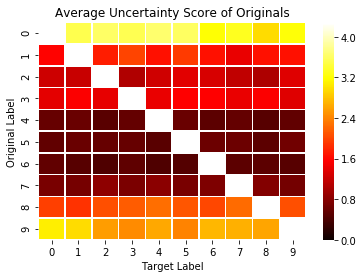

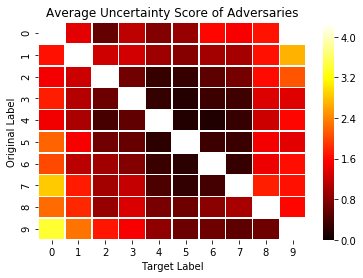

In [26]:
# variance
cifar.uncertainty_heatmap(dropout_prob=0.1, ensemble_size=50, method='variance')


In [ ]:
# entropy
cifar.uncertainty_heatmap(dropout_prob=0.1, ensemble_size=50, method='entropy')


# ===============================================

In [ ]:
# np.save('cifar_fooled_drop0.1_num_50', b)

In [ ]:
import seaborn

_min = min(a.min(), b.min())
_max = max(a.max(), b.max())

seaborn.heatmap(a, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
plt.title('Percentage Corrected')
# plt.title('Average Variance of Originals')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()

seaborn.heatmap(b, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
plt.title('Percentage Fooled')
# plt.title('Average Variance of Adversaries')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()


In [ ]:
import seaborn

_min = min(a.min(), b.min())
_max = max(a.max(), b.max())

seaborn.heatmap(a, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
plt.title('Percentage Corrected')
# plt.title('Average Variance of Originals')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()

seaborn.heatmap(b, linewidth=0.5, cmap='hot', vmin=_min, vmax=_max, mask=np.eye(10,10))
plt.title('Percentage Fooled')
# plt.title('Average Variance of Adversaries')
plt.xlabel('Target Label')
plt.ylabel('Original Label')
plt.show()
